In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
X = pd.DataFrame(digits.data)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
Y = pd.DataFrame(digits.target)
Y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
X_train.shape, Y_train.shape

((1437, 64), (1437, 1))

In [9]:
X_test.shape, Y_test.shape

((360, 64), (360, 1))

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)

In [23]:
model.fit(X_train, Y_train)

C:\Users\manoj\Downloads\New folder\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10)

In [24]:
model.score(X_test, Y_test)

0.95

In [25]:
Y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_predicted, Y_test)
cm

array([[43,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  2,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21]], dtype=int64)

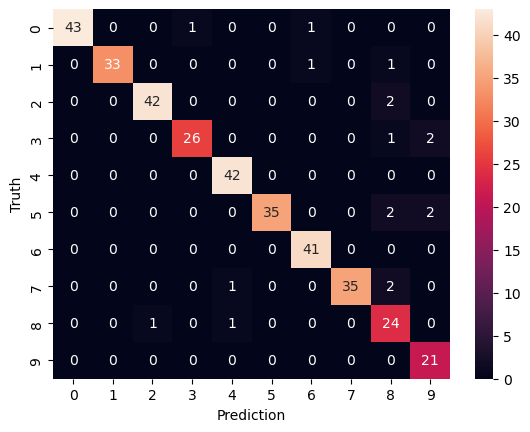

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()